In [6]:
#Loading EDA libraries
import pandas
import numpy

In [7]:
#Loading Data Visualization Libraries
import matplotlib.pyplot
import seaborn

In [8]:
#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#Feature Eliminiation
from sklearn.feature_selection import RFE

In [9]:
#Estimator Selection
from sklearn.linear_model import LogisticRegression

In [10]:
#Feature Importance
from sklearn.ensemble import ExtraTreesClassifier

In [11]:
#Model Selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [12]:
#Model Evaluation
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [13]:
#Saving Models
import joblib

In [14]:
#Decision Tree Plot
from IPython.display import Image
from sklearn import tree
import pydotplus

In [15]:
#Intrepreting Model
import lime
import lime.lime_tabular

In [16]:
#warnings
import warnings

In [17]:
#feature contributions
import eli5

In [18]:
#metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

## Load Dataset

In [19]:
#Giving Column Names
column_names=['Class','AGE','SEX','STEROID','ANTIVIRALS','FATIGUE','MALAISE','ANOREXIA','LIVER BIG','LIVER FIRM','SPLEEN PALPABLE',
              'SPIDERS','ASCITES','VARICES','BILIRUBIN','ALK PHOSPHATE','SGOT','ALBUMIN','PROTIME','HISTOLOGY']

In [20]:
hepatitis=pandas.read_csv('hepatitis.data',names=column_names)

In [21]:
#Checking Column Names
hepatitis.columns

Index(['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE',
       'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS',
       'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN',
       'PROTIME', 'HISTOLOGY'],
      dtype='object')

In [22]:
#Converting columns to lowercase
hepatitis.columns=hepatitis.columns.str.lower().str.replace(" ","_")

In [23]:
hepatitis.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [24]:
#Checking data types
hepatitis.dtypes

class               int64
age                 int64
sex                 int64
steroid            object
antivirals          int64
fatigue            object
malaise            object
anorexia           object
liver_big          object
liver_firm         object
spleen_palpable    object
spiders            object
ascites            object
varices            object
bilirubin          object
alk_phosphate      object
sgot               object
albumin            object
protime            object
histology           int64
dtype: object

In [25]:
#Inserting 0's at ?
hepatitis=hepatitis.replace('?',0)

In [26]:
#Checking Datatypes
hepatitis.dtypes

class               int64
age                 int64
sex                 int64
steroid            object
antivirals          int64
fatigue            object
malaise            object
anorexia           object
liver_big          object
liver_firm         object
spleen_palpable    object
spiders            object
ascites            object
varices            object
bilirubin          object
alk_phosphate      object
sgot               object
albumin            object
protime            object
histology           int64
dtype: object

In [27]:
sum(hepatitis.dtypes=='object')

15

In [28]:
hepatitis.columns[hepatitis.dtypes=='object']

Index(['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 'bilirubin',
       'alk_phosphate', 'sgot', 'albumin', 'protime'],
      dtype='object')

In [29]:
#Converting object to int datatypes with casting
hepatitis[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices',
       'alk_phosphate', 'sgot', 'protime']]=hepatitis[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices',
       'alk_phosphate', 'sgot','protime']].astype(int)

In [30]:
hepatitis.dtypes

class               int64
age                 int64
sex                 int64
steroid             int64
antivirals          int64
fatigue             int64
malaise             int64
anorexia            int64
liver_big           int64
liver_firm          int64
spleen_palpable     int64
spiders             int64
ascites             int64
varices             int64
bilirubin          object
alk_phosphate       int64
sgot                int64
albumin            object
protime             int64
histology           int64
dtype: object

In [31]:
hepatitis[['bilirubin','albumin']]=hepatitis[['bilirubin','albumin']].astype(float)

In [32]:
hepatitis.dtypes

class                int64
age                  int64
sex                  int64
steroid              int64
antivirals           int64
fatigue              int64
malaise              int64
anorexia             int64
liver_big            int64
liver_firm           int64
spleen_palpable      int64
spiders              int64
ascites              int64
varices              int64
bilirubin          float64
alk_phosphate        int64
sgot                 int64
albumin            float64
protime              int64
histology            int64
dtype: object

In [33]:
hepatitis.shape

(155, 20)

In [34]:
hepatitis.count()

class              155
age                155
sex                155
steroid            155
antivirals         155
fatigue            155
malaise            155
anorexia           155
liver_big          155
liver_firm         155
spleen_palpable    155
spiders            155
ascites            155
varices            155
bilirubin          155
alk_phosphate      155
sgot               155
albumin            155
protime            155
histology          155
dtype: int64

In [35]:
##Checking null values
hepatitis.isnull().sum()

class              0
age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
dtype: int64

## Exploratory Data Analysis

## Descriptive Analytics

In [36]:
hepatitis.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.496774,1.845161,1.341935,1.593548,1.780645,1.709677,1.470968,1.741935,1.606452,1.806452,1.819355,1.372258,85.619355,83.677419,3.423226,35.116129,1.451613
std,0.406070,12.565878,0.305240,0.514393,0.362923,0.489350,0.505769,0.430508,0.580727,0.627401,0.507588,0.552406,0.471207,0.462503,1.219992,62.061686,89.527688,1.318343,35.221923,0.499266
min,1.000000,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,51.000000,30.500000,3.050000,0.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,84.000000,55.000000,3.900000,35.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,65.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [37]:
hepatitis['class'].value_counts()

2    123
1     32
Name: class, dtype: int64

In [38]:
target_label={"Die":1,"Live":2}

<AxesSubplot:>

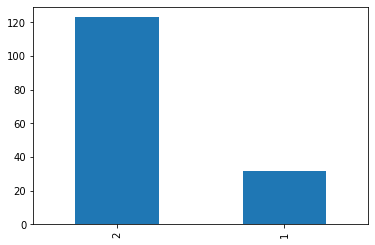

In [39]:
hepatitis['class'].value_counts().plot(kind='bar')

In [40]:
#Counting males and females
hepatitis['sex'].unique()

array([2, 1])

In [41]:
hepatitis['sex'].value_counts()

1    139
2     16
Name: sex, dtype: int64

<AxesSubplot:>

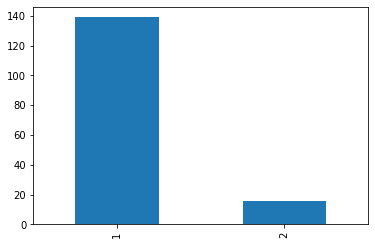

In [42]:
hepatitis['sex'].value_counts().plot(kind='bar')

In [43]:
##Checking Age range
hepatitis.groupby(['age','sex']).size()

age  sex
7    1      1
20   1      2
     2      1
22   1      1
     2      1
23   1      4
24   1      2
25   1      2
     2      1
26   2      1
27   1      4
28   1      4
     2      1
30   1      7
     2      1
31   1      4
32   1      4
33   1      3
34   1      6
     2      2
35   1      2
36   1      7
37   1      5
38   1      8
39   1      6
40   1      3
41   1      2
     2      1
42   1      5
43   1      1
44   1      5
45   1      4
     2      1
46   1      1
47   1      4
48   1      2
49   1      3
50   1      5
     2      1
51   1      6
52   1      3
53   2      1
54   1      5
56   1      3
57   1      2
58   1      1
     2      1
59   1      1
60   1      1
61   1      3
62   1      1
     2      1
64   1      1
65   1      1
66   1      1
67   2      1
69   2      1
70   1      1
72   1      1
78   1      1
dtype: int64

In [44]:
#Distribution Chart of Age
hepatitis['age'].max()

78

In [45]:
hepatitis['age'].min()

7

In [46]:
age_labels=["Less than","10-20","20-30","30-40","40-50","60-70","70 and more"]
bins=[0,10,20,30,40,50,60,70]
df_freq=hepatitis.groupby(pandas.cut(hepatitis['age'],bins=bins,labels=age_labels)).size()

In [47]:
df_freq

age
Less than       1
10-20           3
20-30          29
30-40          50
40-50          35
60-70          24
70 and more    11
dtype: int64

In [48]:
df_freq=df_freq.reset_index(name='count')

In [49]:
df_freq

,age,count
0,Less than,1
1,10-20,3
2,20-30,29
3,30-40,50
4,40-50,35
5,60-70,24
6,70 and more,11


<AxesSubplot:>

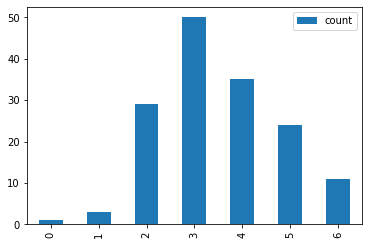

In [50]:
df_freq.plot(kind='bar')

Text(0.5, 1.0, 'Age Frequency ')

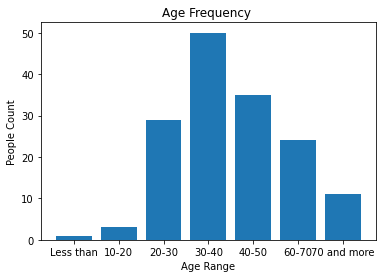

In [51]:
matplotlib.pyplot.bar(df_freq['age'],df_freq['count'])
matplotlib.pyplot.xlabel('Age Range')
matplotlib.pyplot.ylabel('People Count')
matplotlib.pyplot.title('Age Frequency ')

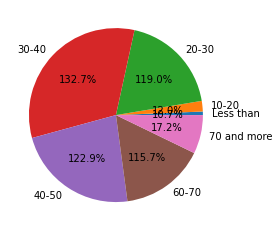

In [52]:
pie_labels=["Less than","10-20","20-30","30-40","40-50","60-70","70 and more"]
#matplotlib.pyplot.figure(figsize=(20,10))
fig,ax=matplotlib.pyplot.subplots()
ax.pie(df_freq['count'],labels=pie_labels,autopct='1%.1f%%')
matplotlib.pyplot.show()

## Checking Outliers

/Users/sahjarakaur/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

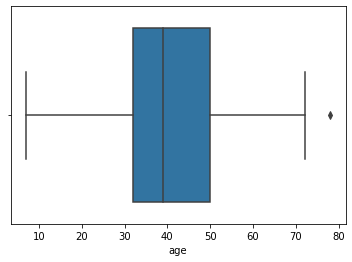

In [53]:
seaborn.boxplot(hepatitis['age'])

/Users/sahjarakaur/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='alk_phosphate'>

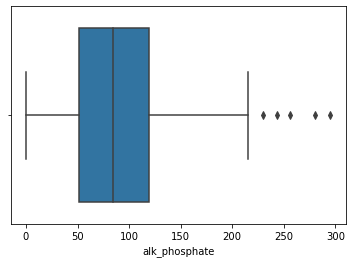

In [54]:
seaborn.boxplot(hepatitis['alk_phosphate'])

/Users/sahjarakaur/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='steroid'>

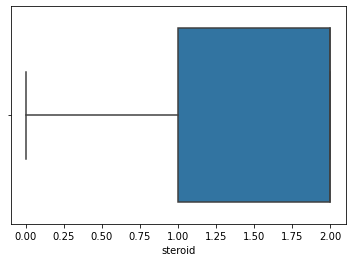

In [55]:
seaborn.boxplot(hepatitis['steroid'])

/Users/sahjarakaur/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='albumin'>

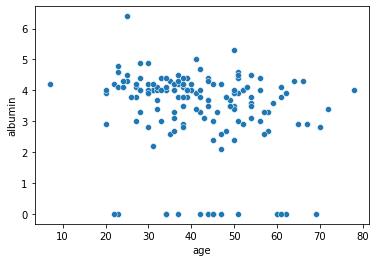

In [56]:
seaborn.scatterplot(hepatitis['age'],hepatitis['albumin'])

<AxesSubplot:xlabel='age', ylabel='albumin'>

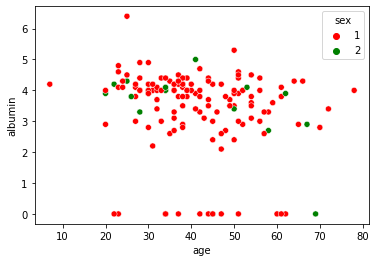

In [57]:
seaborn.scatterplot(x=hepatitis['age'],y=hepatitis['albumin'],hue=hepatitis['sex'],palette=['red','green'],data=hepatitis)

In [58]:
quarter1=hepatitis.quantile(0.25)
quarter3=hepatitis.quantile(0.75)

In [59]:
inter_range=quarter3-quarter1

In [60]:
inter_range

class               0.00
age                18.00
sex                 0.00
steroid             1.00
antivirals          0.00
fatigue             1.00
malaise             1.00
anorexia            0.00
liver_big           0.00
liver_firm          1.00
spleen_palpable     0.00
spiders             1.00
ascites             0.00
varices             0.00
bilirubin           0.80
alk_phosphate      68.50
sgot               68.50
albumin             1.15
protime            65.00
histology           1.00
dtype: float64

In [61]:
(hepatitis<(quarter1-1.5*inter_range)) | (hepatitis>(quarter3+1.5*inter_range))

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,True,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,True,False,False,False
151,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
152,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
153,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False


## Removing Outliers

In [62]:
hepatitis_no_outlier=hepatitis[~((hepatitis<(quarter1-1.5 * inter_range)) | (hepatitis>(quarter3+1.5 * inter_range))).any(axis=1)]

In [63]:
hepatitis_no_outlier

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.7,0,48,4.4,0,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,120,3.9,0,1
13,2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.2,57,144,4.9,78,1
16,2,66,1,2,2,1,2,2,2,2,2,2,2,2,1.2,102,53,4.3,0,1
17,2,40,1,1,2,1,2,2,2,1,2,2,2,2,0.6,62,166,4.0,63,1
18,2,38,1,2,2,2,2,2,2,2,2,2,2,2,0.7,53,42,4.1,85,2
22,2,31,1,2,2,2,2,2,2,2,2,2,2,2,1.0,85,20,4.0,100,1
23,2,42,1,2,2,2,2,2,2,2,2,2,2,2,0.9,60,63,4.7,47,1


In [64]:
hepatitis_no_outlier.shape

(43, 20)

In [65]:
hepatitis.shape

(155, 20)

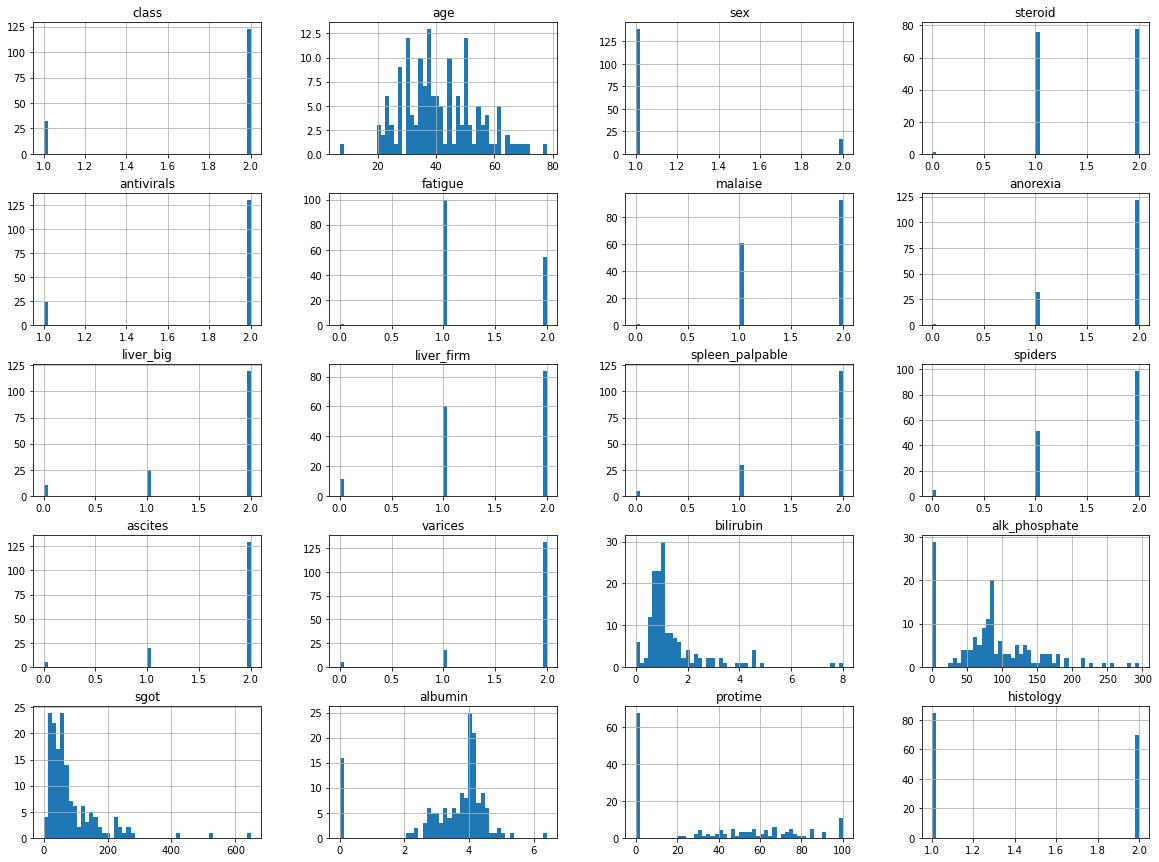

In [66]:
hepatitis.hist(bins=50,figsize=(20,15))
matplotlib.pyplot.show()

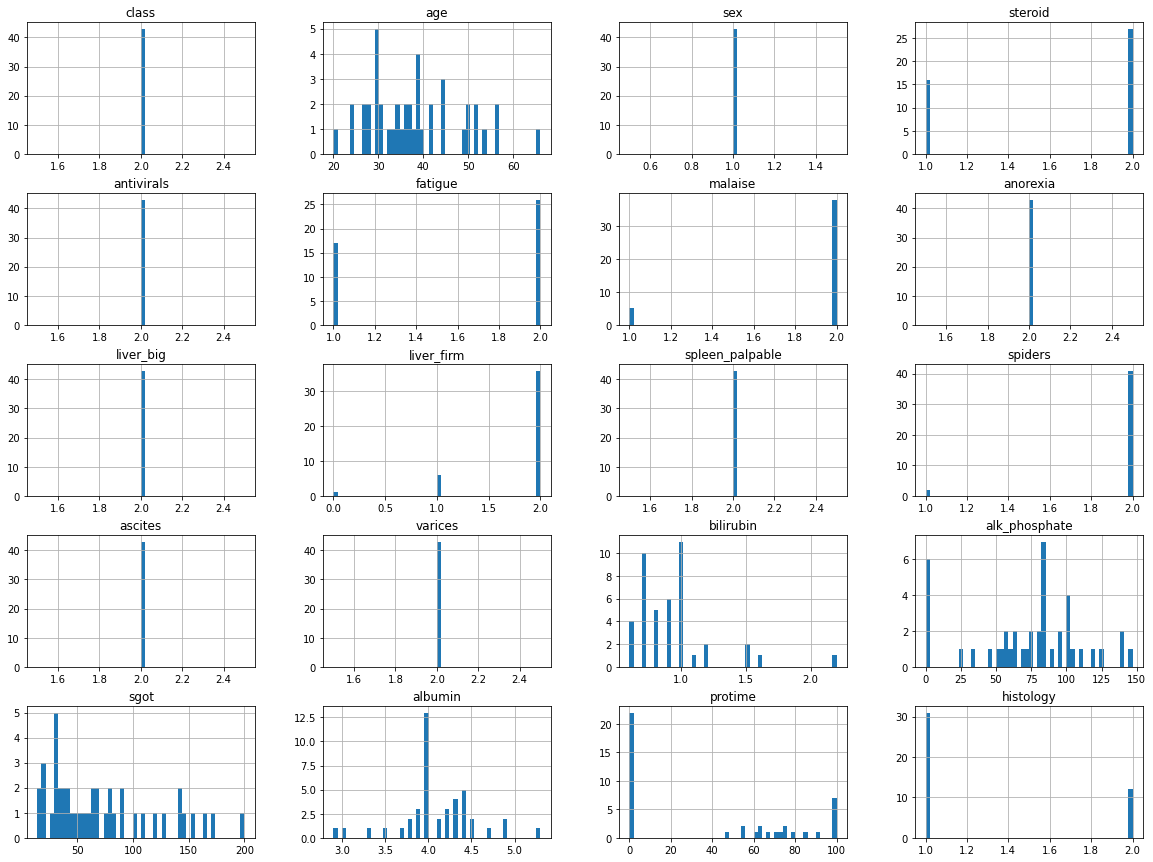

In [67]:
hepatitis_no_outlier.hist(bins=50,figsize=(20,15))
matplotlib.pyplot.show()

## Feature Engineering

In [68]:
hepatitis.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [69]:
x_features=hepatitis[['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology']]
y_labels=hepatitis[['class']]

## SelectKbest

In [70]:
sel=SelectKBest(score_func=chi2,k=10)
feature_best=sel.fit(x_features,y_labels)

In [71]:
feature_best.scores_

array([ 28.47481919,   0.38948319,   0.3995129 ,   0.18634161,
         2.34643234,   2.46803203,   0.19648065,   0.31698209,
         0.9867095 ,   0.74535155,   3.18940804,   2.09639954,
         1.12812176,  30.10247172,  17.88270548,  47.38820795,
         6.87318606, 130.18332457,   3.01854675])

In [72]:
#Append feature names
scores=pandas.DataFrame(feature_best.scores_,columns=['feature_score'])

In [73]:
scores

,feature_score
0,28.474819
1,0.389483
2,0.399513
3,0.186342
4,2.346432
5,2.468032
6,0.196481
7,0.316982
8,0.986710
9,0.745352


In [74]:
fea_col_names=pandas.DataFrame(x_features.columns,columns=['feature_name'])
fea_df=pandas.concat([fea_col_names,scores],axis=1)

In [75]:
fea_df

,feature_name,feature_score
0,age,28.474819
1,sex,0.389483
2,steroid,0.399513
3,antivirals,0.186342
4,fatigue,2.346432
5,malaise,2.468032
6,anorexia,0.196481
7,liver_big,0.316982
8,liver_firm,0.986710
9,spleen_palpable,0.745352


In [76]:
fea_df.nlargest(10,'feature_score')

,feature_name,feature_score
17,protime,130.183325
15,sgot,47.388208
13,bilirubin,30.102472
0,age,28.474819
14,alk_phosphate,17.882705
16,albumin,6.873186
10,spiders,3.189408
18,histology,3.018547
5,malaise,2.468032
4,fatigue,2.346432


In [77]:
fea_df.nlargest(10,'feature_score')['feature_name'].unique()

array(['protime', 'sgot', 'bilirubin', 'age', 'alk_phosphate', 'albumin',
       'spiders', 'histology', 'malaise', 'fatigue'], dtype=object)

## Recursive Feature Elimination

In [78]:
rf=RFE(estimator=LogisticRegression(), n_features_to_select=8)

In [79]:
rf_fit=rf.fit(x_features,y_labels)

/Users/sahjarakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sahjarakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sahjarakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

In [80]:
feature_selected=pandas.DataFrame(rf_fit.support_,columns=['feature_selected'])
feature_ranking=pandas.DataFrame(rf_fit.ranking_,columns=['feature_ranking'])

In [81]:
feature_df=pandas.concat([fea_col_names,feature_selected,feature_ranking],axis=1)

In [82]:
feature_df

,feature_name,feature_selected,feature_ranking
0,age,False,8
1,sex,True,1
2,steroid,False,5
3,antivirals,False,9
4,fatigue,True,1
5,malaise,True,1
6,anorexia,True,1
7,liver_big,False,4
8,liver_firm,False,6
9,spleen_palpable,False,7


## Feature Importance

In [89]:
et_clf=ExtraTreesClassifier()
et_clf.fit(x_features,y_labels)

/var/folders/nc/_x6nb_w548568hsx5jdwmmcc0000gn/T/ipykernel_75571/1580568690.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  et_clf.fit(x_features,y_labels)


ExtraTreesClassifier()

In [90]:
et_clf.feature_importances_

array([0.05694198, 0.02289284, 0.02827359, 0.01060355, 0.02918443,
       0.05809171, 0.02734242, 0.0384441 , 0.05473006, 0.04343449,
       0.06419025, 0.09719229, 0.05287568, 0.09561114, 0.06425108,
       0.0447304 , 0.0801403 , 0.06957713, 0.06149255])

In [91]:
fea_imp_df=pandas.Series(et_clf.feature_importances_,index=x_features.columns)

In [92]:
fea_imp_df

age                0.056942
sex                0.022893
steroid            0.028274
antivirals         0.010604
fatigue            0.029184
malaise            0.058092
anorexia           0.027342
liver_big          0.038444
liver_firm         0.054730
spleen_palpable    0.043434
spiders            0.064190
ascites            0.097192
varices            0.052876
bilirubin          0.095611
alk_phosphate      0.064251
sgot               0.044730
albumin            0.080140
protime            0.069577
histology          0.061493
dtype: float64

<AxesSubplot:>

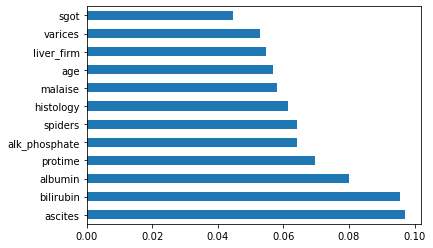

In [93]:
fea_imp_df.nlargest(12).plot(kind='barh')

In [95]:
hepatitis.corr()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
class,1.000000,-0.219647,0.173051,0.121140,-0.130196,0.292206,0.315970,0.110715,0.102151,0.154736,0.180894,0.330194,0.332796,0.249610,-0.424523,-0.050806,-0.056679,0.296489,0.154688,-0.337856
age,-0.219647,1.000000,0.008126,-0.067710,-0.013100,-0.264635,-0.099516,0.100589,-0.126358,-0.100979,-0.127258,-0.206551,-0.125020,-0.114412,0.095626,0.045328,0.078021,-0.191174,-0.059956,0.170780
sex,0.173051,0.008126,1.000000,-0.039222,-0.089249,-0.063947,-0.020895,0.025186,0.023634,0.015750,-0.078414,-0.065592,0.049516,-0.005045,-0.039341,0.162851,-0.008991,-0.018906,0.067128,-0.137450
steroid,0.121140,-0.067710,-0.039222,1.000000,0.101657,0.146292,0.232041,0.084752,0.159877,0.095280,0.071401,0.029781,-0.002593,-0.029759,-0.005835,-0.042245,-0.021032,0.203109,0.032994,-0.070144
antivirals,-0.130196,-0.013100,-0.089249,0.101657,1.000000,-0.065578,-0.026703,-0.052554,-0.060626,-0.019871,-0.183070,-0.176367,-0.176382,-0.167721,0.177958,0.041764,0.095980,-0.153939,-0.276452,0.209242
fatigue,0.292206,-0.264635,-0.063947,0.146292,-0.065578,1.000000,0.617660,0.419991,0.168796,0.254621,0.226850,0.380935,0.288877,0.217311,-0.243964,-0.110505,-0.175476,0.198983,0.073783,-0.131177
malaise,0.315970,-0.099516,-0.020895,0.232041,-0.026703,0.617660,1.000000,0.631662,0.192556,0.197903,0.145236,0.376666,0.376182,0.267029,-0.269910,-0.114810,-0.177297,0.224605,0.067186,-0.116964
anorexia,0.110715,0.100589,0.025186,0.084752,-0.052554,0.419991,0.631662,1.000000,0.185164,0.144556,0.185004,0.371874,0.301514,0.288883,-0.244095,0.035984,-0.188183,0.133743,0.108322,-0.049702
liver_big,0.102151,-0.126358,0.023634,0.159877,-0.060626,0.168796,0.192556,0.185164,1.000000,0.698517,0.338963,0.370229,0.339108,0.238645,-0.028856,0.018895,-0.026293,0.105555,0.174677,-0.104757
liver_firm,0.154736,-0.100979,0.015750,0.095280,-0.019871,0.254621,0.197903,0.144556,0.698517,1.000000,0.322955,0.407114,0.310338,0.295100,-0.069352,-0.179977,-0.149876,0.059700,0.083312,-0.206632


<AxesSubplot:>

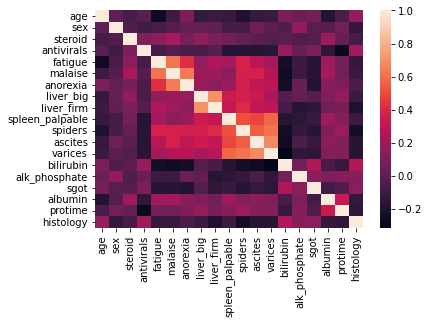

In [96]:
seaborn.heatmap(x_features.corr())

<AxesSubplot:>

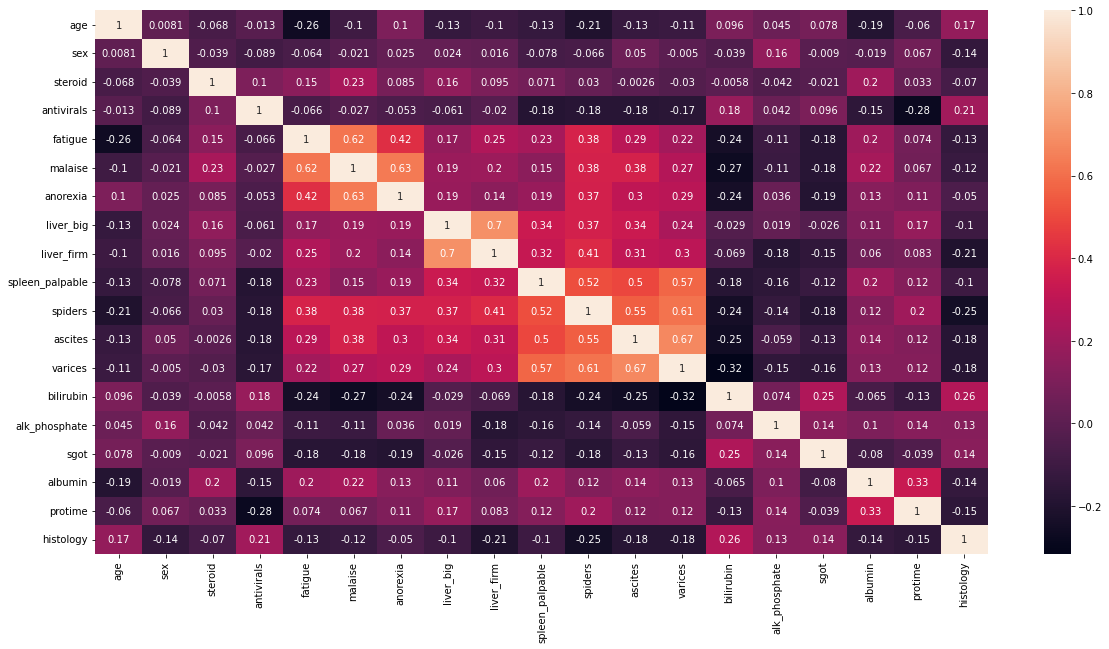

In [97]:
matplotlib.pyplot.figure(figsize=(20,10))
seaborn.heatmap(x_features.corr(),annot=True)

## Building Models

In [98]:
hepatitis.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [99]:
x_features_sel=hepatitis[['age', 'sex', 'steroid', 'antivirals', 'fatigue','spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology']]

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x_features,y_labels,test_size=0.30,random_state=7)

In [101]:
x_train_s,x_test_s,y_train_s,y_test_s=train_test_split(x_features_sel,y_labels,test_size=0.30,random_state=7)

In [102]:
model=LogisticRegression()
model.fit(x_train_s,y_train_s)

/Users/sahjarakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sahjarakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [103]:
model.score(x_test_s,y_test_s)

0.723404255319149

In [104]:
model.predict(x_test_s)

array([2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2])

accuracy_score(y_test_s,model.predict(x_test_s))

In [105]:
dtc=DecisionTreeClassifier(max_depth =13, random_state = 42)

In [106]:
dtc.fit(x_train_s,y_train_s)

DecisionTreeClassifier(max_depth=13, random_state=42)

In [107]:
dtc.score(x_test_s,y_test_s)

0.8085106382978723

In [108]:
kn=KNeighborsClassifier(n_neighbors=3)

In [109]:
kn.fit(x_train_s,y_train_s)

/Users/sahjarakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [110]:
kn.score(x_test_s,y_test_s)

0.7446808510638298

## Saving Model

In [111]:
file_lg=open('logistic_regression_model.pkl','wb')
joblib.dump(model,file_lg)
file_lg.close()

In [112]:
file_knn=open('knn_model.pkl','wb')
joblib.dump(model,file_knn)
file_knn.close()

In [113]:
file_dtc=open('decision_tree_model.pkl','wb')
joblib.dump(model,file_dtc)
file_dtc.close()

## Decision Tree Plot

In [115]:
best=x_features_sel.columns

In [116]:
target=['Die','Live']

In [117]:
data=tree.export_graphviz(dtc,out_file=None,feature_names=best,class_names=target)

In [118]:
gp=pydotplus.graph_from_dot_data(data)

## Intrepreting Models

In [121]:
exp=lime.lime_tabular.LimeTabularExplainer(x_train_s.values,feature_names=best,
                                           class_names=target,discretize_continuous=True)

In [122]:
dic={'Die':1,'Live':2}

In [123]:
one=x_test.iloc[1]

In [124]:
one

age                 58.0
sex                  1.0
steroid              2.0
antivirals           2.0
fatigue              1.0
malaise              2.0
anorexia             2.0
liver_big            1.0
liver_firm           1.0
spleen_palpable      1.0
spiders              1.0
ascites              2.0
varices              2.0
bilirubin            2.0
alk_phosphate      167.0
sgot               242.0
albumin              3.3
protime              0.0
histology            1.0
Name: 76, dtype: float64

In [125]:
x_test_s.iloc[1]

age               58.0
sex                1.0
steroid            2.0
antivirals         2.0
fatigue            1.0
spiders            1.0
ascites            2.0
varices            2.0
bilirubin          2.0
alk_phosphate    167.0
sgot             242.0
albumin            3.3
protime            0.0
histology          1.0
Name: 76, dtype: float64

In [130]:
model.predict(numpy.array(x_test_s.iloc[1]).reshape(1,-1))

/Users/sahjarakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

In [131]:
explain=exp.explain_instance(x_test_s.iloc[1],model.predict_proba,num_features=14,top_labels=1)

/Users/sahjarakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [132]:
explain.as_list()

[('bilirubin > 1.50', -0.4034288854039321),
 ('sex <= 1.00', -0.23172604711703595),
 ('spiders <= 1.00', -0.13311584125078588),
 ('histology <= 1.00', 0.12048925743811036),
 ('sgot > 90.50', 0.1069318157512844),
 ('alk_phosphate > 119.25', -0.09235522892514661),
 ('age > 50.25', -0.05456440826621089),
 ('2.98 < albumin <= 4.00', 0.04783188713742955),
 ('protime <= 0.00', 0.04743531940041327),
 ('1.50 < steroid <= 2.00', 0.040610984479422046),
 ('fatigue <= 1.00', 0.025693463354973457),
 ('antivirals <= 2.00', 0.0),
 ('ascites <= 2.00', 0.0),
 ('varices <= 2.00', 0.0)]

In [133]:
eli5.show_weights(model,top=10)

In [134]:
names=['age', 'sex', 'steroid', 'antivirals', 'fatigue','spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology']

In [135]:
eli5.show_weights(model,feature_names=names,target_names=target)

Weight?,Feature
+1.139,sex
+0.747,spiders
+0.577,ascites
+0.502,albumin
+0.270,steroid
+0.018,<BIAS>
+0.004,sgot
-0.005,protime
-0.006,alk_phosphate
-0.016,age


In [136]:
eli5.show_prediction(model,x_test_s.iloc[1],feature_names=names,target_names=target)

In [137]:
y_Pred=model.predict(x_test_s)

In [138]:
accuracy_score(y_test,y_Pred)

0.723404255319149

/Users/sahjarakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


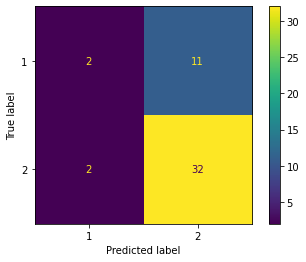

In [139]:
plot_confusion_matrix(model,x_test_s,y_test_s)

In [140]:
print(classification_report(y_test,y_Pred))

              precision    recall  f1-score   support

           1       0.50      0.15      0.24        13
           2       0.74      0.94      0.83        34

    accuracy                           0.72        47
   macro avg       0.62      0.55      0.53        47
weighted avg       0.68      0.72      0.67        47



In [143]:
hepatitis.to_csv('clean_data_h.csv',index=False)